In [131]:
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql import HiveContext
from pyspark.sql import SQLContext
import pyspark.sql.functions as func
conf = SparkConf().setMaster("local").setAppName("OccupancyProject")
#sc = SparkContext(conf = conf)
#sqlContext = SQLContext(sc)
sqlContext = pyspark.SQLContext(sc)
sc

<SparkContext master=local appName=OccupancyProject>

In [167]:
OccupancyData_2 = sc.textFile("C:/Backup/BAIS/Big Data/Project/OccupancyProject-master/OccupancyData_2.csv")
OccupancyData_1 = sc.textFile("C:/Users/engga/Downloads/OccupancyData_1.txt")
OccupancyTraining = sqlContext.read.json("C:/Backup/BAIS/Big Data/Project/OccupancyProject-master/OccupancyData_Train.json", multiLine=True)

In [133]:
OccupancyData_1.take(5)

['"date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"',
 '140,"2015-02-02 14:19:00",23.7,26.272,585.2,749.2,0.00476416302416414,1',
 '"141","2015-02-02 14:19:59",23.718,26.29,578.4,760.4,0.00477266099212519,1',
 '"142","2015-02-02 14:21:00",23.73,26.23,572.666666666667,769.666666666667,0.00476515255246541,1',
 '"143","2015-02-02 14:22:00",23.7225,26.125,493.75,774.75,0.00474377335599685,1']

In [134]:
OccupancyData_2.take(5)

['date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Column1',
 '1,2/11/2015 14:48,21.76,31.13333333,437.3333333,1029.666667,0.005021011,1',
 '2,2/11/2015 14:49,21.79,31,437.3333333,1000,0.005008581,1',
 '3,2/11/2015 14:50,21.7675,31.1225,434,1003.75,0.005021569,1',
 '4,2/11/2015 14:51,21.7675,31.1225,439,1009.5,0.005021569,1']

In [135]:
header1=OccupancyData_1.first()
OccupancyData_1=OccupancyData_1.filter(lambda line: line!=header1)

In [136]:
header2=OccupancyData_2.first()
OccupancyData_2=OccupancyData_2.filter(lambda line: line!=header2)

In [137]:
Occupancy_DF1 = OccupancyData_1.map(lambda x: x.split(",")).map(lambda x: (float(x[0].replace('"','')), float(x[2]), float(x[3]), float(x[4]), float(x[5]), float(x[6]), float(x[7]))).toDF()

In [138]:
Occupancy_DF2 = OccupancyData_2.map(lambda x: x.split(",")).map(lambda x: (float(x[0].replace('"','')), float(x[2]), float(x[3]), float(x[4]), float(x[5]), float(x[6]), float(x[7]))).toDF()

In [139]:
Occupancy_DF1.printSchema()

root
 |-- _1: double (nullable = true)
 |-- _2: double (nullable = true)
 |-- _3: double (nullable = true)
 |-- _4: double (nullable = true)
 |-- _5: double (nullable = true)
 |-- _6: double (nullable = true)
 |-- _7: double (nullable = true)



In [140]:
Occupancy_DF2.printSchema()

root
 |-- _1: double (nullable = true)
 |-- _2: double (nullable = true)
 |-- _3: double (nullable = true)
 |-- _4: double (nullable = true)
 |-- _5: double (nullable = true)
 |-- _6: double (nullable = true)
 |-- _7: double (nullable = true)



In [141]:
Occupancy_DF1 = Occupancy_DF1.selectExpr("_1 as ID", "_2 as Temperature","_3 as Humidity", "_4 as Light", "_5 as CO2","_6 as HumidityRatio","_7 as Occupancy")

In [142]:
Occupancy_DF2 = Occupancy_DF2.selectExpr("_1 as ID", "_2 as Temperature","_3 as Humidity", "_4 as Light", "_5 as CO2","_6 as HumidityRatio","_7 as Occupancy")

In [143]:
Occupancy_DF1.printSchema()

root
 |-- ID: double (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Light: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- Occupancy: double (nullable = true)



In [144]:
Occupancy_DF2.printSchema()

root
 |-- ID: double (nullable = true)
 |-- Temperature: double (nullable = true)
 |-- Humidity: double (nullable = true)
 |-- Light: double (nullable = true)
 |-- CO2: double (nullable = true)
 |-- HumidityRatio: double (nullable = true)
 |-- Occupancy: double (nullable = true)



In [145]:
Occupancy_DF1.show(3)

+-----+-----------+--------+----------------+----------------+-------------------+---------+
|   ID|Temperature|Humidity|           Light|             CO2|      HumidityRatio|Occupancy|
+-----+-----------+--------+----------------+----------------+-------------------+---------+
|140.0|       23.7|  26.272|           585.2|           749.2|0.00476416302416414|      1.0|
|141.0|     23.718|   26.29|           578.4|           760.4|0.00477266099212519|      1.0|
|142.0|      23.73|   26.23|572.666666666667|769.666666666667|0.00476515255246541|      1.0|
+-----+-----------+--------+----------------+----------------+-------------------+---------+
only showing top 3 rows



In [146]:
Occupancy_DF2.show(3)

+---+-----------+-----------+-----------+-----------+-------------+---------+
| ID|Temperature|   Humidity|      Light|        CO2|HumidityRatio|Occupancy|
+---+-----------+-----------+-----------+-----------+-------------+---------+
|1.0|      21.76|31.13333333|437.3333333|1029.666667|  0.005021011|      1.0|
|2.0|      21.79|       31.0|437.3333333|     1000.0|  0.005008581|      1.0|
|3.0|    21.7675|    31.1225|      434.0|    1003.75|  0.005021569|      1.0|
+---+-----------+-----------+-----------+-----------+-------------+---------+
only showing top 3 rows



In [147]:
OccupancyTraining.show(3)

+------+--------+-------------------+---+-----+---------+-----------+-------------------+
|   CO2|Humidity|      HumidityRatio| ID|Light|Occupancy|Temperature|               date|
+------+--------+-------------------+---+-----+---------+-----------+-------------------+
|721.25|  27.272|0.00479298817650529|  1|426.0|        1|      23.18|2015-02-04 17:51:00|
| 714.0| 27.2675|0.00478344094931065|  2|429.5|        1|      23.15|2015-02-04 17:51:59|
| 713.5|  27.245|0.00477946352442199|  3|426.0|        1|      23.15|2015-02-04 17:53:00|
+------+--------+-------------------+---+-----+---------+-----------+-------------------+
only showing top 3 rows



In [148]:
OccupancyTraining=OccupancyTraining.dropna()
Occupancy_DF1=Occupancy_DF1.dropna()
Occupancy_DF2=Occupancy_DF2.dropna()
OccupancyTraining=OccupancyTraining.drop(OccupancyTraining.date)

In [149]:
OccupancyTraining=OccupancyTraining.withColumn("Light", func.round(OccupancyTraining["Light"], 3))
Occupancy_DF1=Occupancy_DF1.withColumn("Light", func.round(Occupancy_DF1["Light"], 3))
Occupancy_DF2=Occupancy_DF2.withColumn("Light", func.round(Occupancy_DF2["Light"], 3))

In [150]:
OccupancyTraining=OccupancyTraining.withColumn("CO2", func.round(OccupancyTraining["CO2"], 3))
Occupancy_DF1=Occupancy_DF1.withColumn("CO2", func.round(Occupancy_DF1["CO2"], 3))
Occupancy_DF2=Occupancy_DF2.withColumn("CO2", func.round(Occupancy_DF2["CO2"], 3))

In [151]:
OccupancyTraining.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CO2,8143,606.5462424167989,314.3208743972201,412.75,2028.5
Humidity,8143,25.731507286422527,5.531210999582105,16.745,39.1175
HumidityRatio,8143,0.0038625066783203907,8.523312991431639E-4,0.00267412691390407,0.00647601323671025
ID,8143,4072.0,2350.825954141792,1,8143
Light,8143,119.51937308117397,194.75580460425596,0.0,1546.333
Occupancy,8143,0.2123296082524868,0.40898201283831825,0,1
Temperature,8143,20.61908364034621,1.0169164411058336,19.0,23.18


In [152]:
Occupancy_DF1.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,2665,1472.0,769.4635577249039,140.0,2804.0
Temperature,2665,21.43387628875156,1.0280241758910023,20.2,24.4083333333333
Humidity,2665,25.353936799785547,2.436842325144458,22.1,31.4725
Light,2665,193.22755609756084,250.21090652091797,0.0,1697.25
CO2,2665,717.9064679174498,292.681718646222,427.5,1402.25
HumidityRatio,2665,0.004027010287333552,6.105726883437672E-4,0.00330331447223472,0.00537775883971339
Occupancy,2665,0.3647279549718574,0.48144412849428336,0.0,1.0


In [153]:
Occupancy_DF2.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
ID,9752,4876.5,2815.304246435898,1.0,9752.0
Temperature,9752,21.001768440662737,1.0206932150211998,19.5,24.39
Humidity,9752,29.891910206470865,3.9528438069120786,21.865,39.5
Light,9752,123.06792893765379,208.22127486443952,0.0,1581.0
CO2,9752,753.2248303937658,297.0961141142924,484.667,2076.5
HumidityRatio,9752,0.004588778038863832,5.309846212950924E-4,0.003274764,0.005768608
Occupancy,9752,0.21011074651353567,0.40740795394635093,0.0,1.0


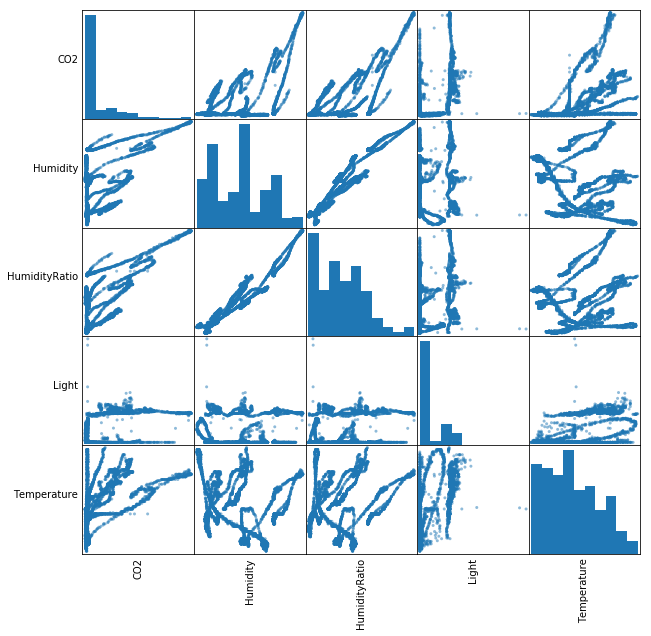

In [155]:
import pandas as pd
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = OccupancyTraining.select(numeric_features).sample(False, 0.8).toPandas()
axs = pd.plotting.scatter_matrix(sampled_data, figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [154]:
##Reference from https://towardsdatascience.com/building-a-linear-regression-with-pyspark-and-mllib-d065c3ba246a
import six
for i in OccupancyTraining.columns:
    if not( isinstance(OccupancyTraining.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to Occupancy for ", i, OccupancyTraining.stat.corr('Occupancy',i))

Correlation to Occupancy for  CO2 0.7122352340318328
Correlation to Occupancy for  Humidity 0.13296424177683092
Correlation to Occupancy for  HumidityRatio 0.30028159391338033
Correlation to Occupancy for  ID -0.09815523941546457
Correlation to Occupancy for  Light 0.9073521217772279
Correlation to Occupancy for  Occupancy 1.0
Correlation to Occupancy for  Temperature 0.5382196930177295


In [158]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], outputCol = 'features')
OT = vectorAssembler.transform(OccupancyTraining)
OT = OT.select(['Features', 'Occupancy'])
OT.show(3)

+--------------------+---------+
|            Features|Occupancy|
+--------------------+---------+
|[23.18,27.272,426...|        1|
|[23.15,27.2675,42...|        1|
|[23.15,27.245,426...|        1|
+--------------------+---------+
only showing top 3 rows



In [159]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], outputCol = 'features')
OT_T1 = vectorAssembler.transform(Occupancy_DF1)
OT_T1 = OT_T1.select(['Features', 'Occupancy'])
OT_T1.show(3)

+--------------------+---------+
|            Features|Occupancy|
+--------------------+---------+
|[23.7,26.272,585....|      1.0|
|[23.718,26.29,578...|      1.0|
|[23.73,26.23,572....|      1.0|
+--------------------+---------+
only showing top 3 rows



In [160]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio'], outputCol = 'features')
OT_T2 = vectorAssembler.transform(Occupancy_DF2)
OT_T2 = OT_T2.select(['Features', 'Occupancy'])
OT_T2.show(3)

+--------------------+---------+
|            Features|Occupancy|
+--------------------+---------+
|[21.76,31.1333333...|      1.0|
|[21.79,31.0,437.3...|      1.0|
|[21.7675,31.1225,...|      1.0|
+--------------------+---------+
only showing top 3 rows



In [161]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'Features', labelCol='Occupancy', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(OT)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0005860254127035638,0.0,0.0]
Intercept: 0.1422882183165206


In [162]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.309151
r2: 0.428541


In [163]:
OT.describe().show()

+-------+-------------------+
|summary|          Occupancy|
+-------+-------------------+
|  count|               8143|
|   mean| 0.2123296082524868|
| stddev|0.40898201283831825|
|    min|                  0|
|    max|                  1|
+-------+-------------------+



In [164]:
predictions = lr_model.transform(OT_T1)
predictions.select("prediction","Occupancy","features").show()

+-------------------+---------+--------------------+
|         prediction|Occupancy|            features|
+-------------------+---------+--------------------+
| 0.4852302898306462|      1.0|[23.7,26.272,585....|
|0.48124531702426193|      1.0|[23.718,26.29,578...|
| 0.4778856333332324|      1.0|[23.73,26.23,572....|
|0.43163826583890524|      1.0|[23.7225,26.125,4...|
| 0.4286202349634819|      1.0|[23.754,26.2,488....|
|0.47554153168241814|      1.0|[23.76,26.26,568....|
| 0.4565929859880611|      1.0|[23.73,26.29,536....|
| 0.4405751533826346|      1.0|[23.754,26.29,509...|
|  0.421236314763417|      1.0|[23.754,26.35,476...|
|0.44116117879533817|      1.0|[23.736,26.39,510...|
| 0.4244594545332866|      1.0|[23.745,26.445,48...|
| 0.4246352621570977|      1.0|[23.7,26.56,481.8...|
|0.42079679570388934|      1.0|[23.7,26.6,475.25...|
|  0.417134136874492|      1.0|[23.7,26.7,469.0,...|
| 0.4142040098109742|      1.0|[23.7,26.774,464....|
| 0.4142040098109742|      1.0|[23.7,26.89,464

In [165]:
lr_predictions = lr_model.transform(OT_T1)
lr_predictions.select("prediction","Occupancy","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Occupancy",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-------------------+---------+--------------------+
|         prediction|Occupancy|            features|
+-------------------+---------+--------------------+
| 0.4852302898306462|      1.0|[23.7,26.272,585....|
|0.48124531702426193|      1.0|[23.718,26.29,578...|
| 0.4778856333332324|      1.0|[23.73,26.23,572....|
|0.43163826583890524|      1.0|[23.7225,26.125,4...|
| 0.4286202349634819|      1.0|[23.754,26.2,488....|
+-------------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.42101


In [166]:
lr_predictions = lr_model.transform(OT_T2)
lr_predictions.select("prediction","Occupancy","features").show(5)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Occupancy",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+---------+--------------------+
|        prediction|Occupancy|            features|
+------------------+---------+--------------------+
|0.3985764701304083|      1.0|[21.76,31.1333333...|
|0.3985764701304083|      1.0|[21.79,31.0,437.3...|
|0.3966232474298673|      1.0|[21.7675,31.1225,...|
|0.3995533744933851|      1.0|[21.7675,31.1225,...|
|0.3985764701304083|      1.0|[21.79,31.1333333...|
+------------------+---------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.458002
